In [47]:
import pandas as pd
import glob
#import matplotlib as plt
import matplotlib.pyplot as plt

In [27]:
# Mercy codes starts here
#practice branching


In [28]:
# Mercy codes ends here

In [29]:
# Ash codes starts here

#Ash just adding some notes
print("Ash starts here")
#Note 1
#Note 2
#Note 3

Ash starts here


In [30]:

#These four files are the same they contain year - just append them into a dataframe
path = r'./Resources/' # use your path

all_files = glob.glob(path + "/*_Quality_*.csv")

all_files
li = []

for filename in all_files:

     df = pd.read_csv(filename, index_col=None, header=0)

     li.append(df)

QOL_df = pd.concat(li, axis=0, ignore_index=True)

#Bring in suicide file

suicide_rates_df = pd.read_csv(path + 'suicide-death-rates-by-sex.csv')



#rename entity column to country
suicide_rates_df = suicide_rates_df.rename(columns={"Entity":"Country"})


#Inner join Suicide_rates_df with frame
combined_QOF_df = pd.merge(suicide_rates_df, QOL_df, how='inner', on=['Country', 'Year'])

combined_QOF_df  #This data frame should have everything we need to do analysis.

#frame view fram make sure its ok. you can output file on a mac with command below to view in excel
#Output file to see what output looks like
#combined_QOF_df.to_csv(r'c:\Users\Ashwin Patel\Desktop\export_226dataframe.csv')
#QOL_df.to_csv(r'c:\Users\Ashwin Patel\Desktop\export_227dataframe.csv')



,Country,Code,Year,"Female (deaths per 100,000)","Male (deaths per 100,000)","Both sexes (deaths per 100,000)",Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Argentina,ARG,2013,4.14,18.70,11.074010,45,72.53,51.09,40.71,78.26,69.68,10.19,46.71,55.56,-
1,Argentina,ARG,2014,4.07,18.25,10.820289,41,81.12,57.08,42.52,76.75,66.85,8.95,45.00,57.45,-
2,Argentina,ARG,2015,4.01,17.82,10.570321,52,77.01,59.38,37.60,75.18,67.12,11.59,41.39,55.88,-
3,Argentina,ARG,2016,4.00,17.95,10.627446,36,138.48,74.92,36.72,73.73,64.09,12.22,42.36,58.46,91.7
4,Armenia,ARM,2015,3.42,14.56,8.522066,60,49.07,27.74,70.86,48.33,40.68,13.39,26.09,73.03,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Uruguay,URY,2015,6.88,28.87,17.119112,42,93.06,44.87,52.83,67.92,68.55,11.23,45.00,31.72,-
265,Venezuela,VEN,2013,2.09,14.94,8.394513,67,-48.27,18.71,14.30,44.44,110.55,20.78,38.75,81.89,-
266,Venezuela,VEN,2014,2.09,15.06,8.445635,68,-39.32,17.87,18.50,41.05,114.36,20.19,38.75,73.96,-
267,Venezuela,VEN,2015,2.07,15.24,8.524199,86,-53.04,11.90,15.93,38.52,111.01,22.23,30.60,79.19,-


In [6]:
#Ash ends here

In [7]:
# Onome codes starts here

In [8]:
# Take in all of Quality of Life data and read it into pandas

quality_of_life_2013 = "./Resources/2013_Quality_of_life_data.csv"
quality_of_life_2014 = "./Resources/2014_Quality_of_life_data.csv"
quality_of_life_2015 = "./Resources/2015_Quality_of_life_data.csv"
quality_of_life_2016 = "./Resources/2016_Quality_of_life_data.csv"
suicide_rates = "./Resources/suicide-death-rates-by-sex.csv"

quality_of_life_2013_df = pd.read_csv(quality_of_life_2013)
quality_of_life_2014_df = pd.read_csv(quality_of_life_2014)
quality_of_life_2015_df = pd.read_csv(quality_of_life_2015)
quality_of_life_2016_df = pd.read_csv(quality_of_life_2016)
suicide_rates_df = pd.read_csv(suicide_rates)

quality_of_life_2013_df

,Rank,Country,Year,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,22.97,-
1,2,Germany,2013,204.84,118.00,76.14,73.25,87.56,5.00,31.89,28.43,-
2,3,United States,2013,199.56,138.38,46.56,67.76,79.57,2.20,39.54,32.53,-
3,4,Sweden,2013,191.36,108.25,68.19,78.70,110.72,8.75,27.90,18.79,-
4,5,Canada,2013,186.03,111.04,65.02,72.79,95.47,5.08,38.76,26.52,-
...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,Pakistan,2013,7.67,26.38,38.48,47.88,32.83,17.49,16.00,86.96,-
63,64,Egypt,2013,7.59,27.41,51.33,59.08,44.12,12.33,59.00,89.86,-
64,65,Iran,2013,-6.96,35.75,43.85,45.66,56.97,16.33,58.28,90.23,-
65,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,85.14,-


In [9]:
# Merge the first two datasets on "quality of life" 
combined_QOF_df = pd.merge(quality_of_life_2013_df, quality_of_life_2014_df, on='Country')


# Rename our _x columns to have year appened to each column name
combined_QOF_df = combined_QOF_df.rename(columns={"Rank_x":"2013 Rank",
                                                  "Year_x":"Year 2013",
                                                  "Quality of Life Index_x":"2013 Quality of Life Index",
                                                  "Purchasing Power Index_x":"2013 Purchasing Power Index",
                                                  "Safety Index_x":"2013 Safety Index",
                                                  "Health Care Index_x":"2013 Health Care Index",
                                                  "Cost of Living Index_x":"2013 Cost of Living Index",
                                                  "Property Price to Income Ratio_x":"2013 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index_x":"2013 Traffic Commute Time Index",
                                                  "Pollution Index_x":"2013 Pollution Index",
                                                  "Climate Index_x":"2013 Climate Index"
                                                 })


# Rename our _y columns to have year appened to each column name
combined_QOF_df = combined_QOF_df.rename(columns={"Rank_y":"2014 Rank",
                                                  "Year_y":"Year 2014",
                                                  "Quality of Life Index_y":"2014 Quality of Life Index",
                                                  "Purchasing Power Index_y":"2014 Purchasing Power Index",
                                                  "Safety Index_y":"2014 Safety Index",
                                                  "Health Care Index_y":"2014 Health Care Index",
                                                  "Cost of Living Index_y":"2014 Cost of Living Index",
                                                  "Property Price to Income Ratio_y":"2014 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index_y":"2014 Traffic Commute Time Index",
                                                  "Pollution Index_y":"2014 Pollution Index",
                                                  "Climate Index_y":"2014 Climate Index"
                                                 })

combined_QOF_df



,2013 Rank,Country,Year 2013,2013 Quality of Life Index,2013 Purchasing Power Index,2013 Safety Index,2013 Health Care Index,2013 Cost of Living Index,2013 Property Price to Income Ratio,2013 Traffic Commute Time Index,...,Year 2014,2014 Quality of Life Index,2014 Purchasing Power Index,2014 Safety Index,2014 Health Care Index,2014 Cost of Living Index,2014 Property Price to Income Ratio,2014 Traffic Commute Time Index,2014 Pollution Index,2014 Climate Index
0,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,2014,206.23,138.05,68.21,67.95,143.88,7.05,24.55,26.80,-
1,2,Germany,2013,204.84,118.00,76.14,73.25,87.56,5.00,31.89,...,2014,192.69,112.28,72.86,75.26,87.14,5.60,36.07,30.20,-
2,3,United States,2013,199.56,138.38,46.56,67.76,79.57,2.20,39.54,...,2014,195.55,132.91,49.85,68.58,77.39,2.43,37.13,35.13,-
3,4,Sweden,2013,191.36,108.25,68.19,78.70,110.72,8.75,27.90,...,2014,180.92,106.11,61.72,75.22,103.68,9.41,34.07,17.51,-
4,5,Canada,2013,186.03,111.04,65.02,72.79,95.47,5.08,38.76,...,2014,178.29,105.53,63.71,71.94,87.90,5.57,39.17,27.70,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,63,Pakistan,2013,7.67,26.38,38.48,47.88,32.83,17.49,16.00,...,2014,22.32,31.53,36.25,50.40,29.69,13.92,25.12,80.25,-
60,64,Egypt,2013,7.59,27.41,51.33,59.08,44.12,12.33,59.00,...,2014,5.41,25.57,47.57,61.30,38.26,11.09,60.83,91.23,-
61,65,Iran,2013,-6.96,35.75,43.85,45.66,56.97,16.33,58.28,...,2014,-11.08,30.33,44.99,48.60,49.51,20.63,54.45,86.07,-
62,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,...,2014,21.85,26.44,53.33,60.23,39.00,18.79,41.07,73.78,-


In [10]:
# Merge our newly combined dataframe with the 2015 dataframe
combined_QOF_df = pd.merge(combined_QOF_df, quality_of_life_2015_df, on="Country")

combined_QOF_df = combined_QOF_df.rename(columns={"Rank":"2015 Rank",
                                                  "Year":"Year 2015",
                                                  "Quality of Life Index":"2015 Quality of Life Index",
                                                  "Purchasing Power Index":"2015 Purchasing Power Index",
                                                  "Safety Index":"2015 Safety Index",
                                                  "Health Care Index":"2015 Health Care Index",
                                                  "Cost of Living Index":"2015 Cost of Living Index",
                                                  "Property Price to Income Ratio":"2015 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index":"2015 Traffic Commute Time Index",
                                                  "Pollution Index":"2015 Pollution Index",
                                                  "Climate Index":"2015 Climate Index"
                                                 })

combined_QOF_df

,2013 Rank,Country,Year 2013,2013 Quality of Life Index,2013 Purchasing Power Index,2013 Safety Index,2013 Health Care Index,2013 Cost of Living Index,2013 Property Price to Income Ratio,2013 Traffic Commute Time Index,...,Year 2015,2015 Quality of Life Index,2015 Purchasing Power Index,2015 Safety Index,2015 Health Care Index,2015 Cost of Living Index,2015 Property Price to Income Ratio,2015 Traffic Commute Time Index,2015 Pollution Index,2015 Climate Index
0,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,2015,222.94,146.51,73.23,66.31,126.03,7.28,25.63,24.07,-
1,2,Germany,2013,204.84,118.00,76.14,73.25,87.56,5.00,31.89,...,2015,195.94,111.84,71.51,75.61,76.27,6.61,31.08,28.32,-
2,3,United States,2013,199.56,138.38,46.56,67.76,79.57,2.20,39.54,...,2015,192.49,126.09,49.99,67.75,76.53,2.62,35.96,31.45,-
3,4,Sweden,2013,191.36,108.25,68.19,78.70,110.72,8.75,27.90,...,2015,193.86,110.95,57.91,76.29,82.91,9.25,26.90,15.14,-
4,5,Canada,2013,186.03,111.04,65.02,72.79,95.47,5.08,38.76,...,2015,177.63,105.07,62.54,69.60,81.80,5.52,38.88,27.30,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,63,Pakistan,2013,7.67,26.38,38.48,47.88,32.83,17.49,16.00,...,2015,21.82,33.21,38.84,51.16,30.71,14.32,25.14,83.73,-
60,64,Egypt,2013,7.59,27.41,51.33,59.08,44.12,12.33,59.00,...,2015,-7.07,25.84,39.86,54.69,37.22,11.33,56.85,96.62,-
61,65,Iran,2013,-6.96,35.75,43.85,45.66,56.97,16.33,58.28,...,2015,1.07,30.65,49.10,50.12,44.53,20.78,47.44,82.28,-
62,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,...,2015,22.70,26.01,52.78,66.09,39.35,18.93,41.63,74.41,-


In [11]:
# Merge our newly combined dataframe with the 2016 dataframe


combined_QOF_df = pd.merge(combined_QOF_df, quality_of_life_2016_df, on="Country")

combined_QOF_df = combined_QOF_df.rename(columns={"Rank":"2016 Rank",
                                                  "Year":"Year 2016",
                                                  "Quality of Life Index":"2016 Quality of Life Index",
                                                  "Purchasing Power Index":"2016 Purchasing Power Index",
                                                  "Safety Index":"2016 Safety Index",
                                                  "Health Care Index":"2016 Health Care Index",
                                                  "Cost of Living Index":"2016 Cost of Living Index",
                                                  "Property Price to Income Ratio":"2016 Property Price to Income Ratio",
                                                  "Traffic Commute Time Index":"2016 Traffic Commute Time Index",
                                                   "Pollution Index":"2016 Pollution Index",
                                                  "Climate Index":"2016 Climate Index"
                                                 })

combined_QOF_df

,2013 Rank,Country,Year 2013,2013 Quality of Life Index,2013 Purchasing Power Index,2013 Safety Index,2013 Health Care Index,2013 Cost of Living Index,2013 Property Price to Income Ratio,2013 Traffic Commute Time Index,...,Year 2016,2016 Quality of Life Index,2016 Purchasing Power Index,2016 Safety Index,2016 Health Care Index,2016 Cost of Living Index,2016 Property Price to Income Ratio,2016 Traffic Commute Time Index,2016 Pollution Index,2016 Climate Index
0,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,2016,208.54,178.74,74.27,68.88,123.10,8.57,28.73,23.02,70.50
1,2,Germany,2013,204.84,118.00,76.14,73.25,87.56,5.00,31.89,...,2016,199.70,147.61,67.05,75.85,65.54,7.13,29.07,29.91,63.02
2,3,United States,2013,199.56,138.38,46.56,67.76,79.57,2.20,39.54,...,2016,183.96,139.17,51.13,67.76,74.08,3.37,33.35,34.94,67.57
3,4,Sweden,2013,191.36,108.25,68.19,78.70,110.72,8.75,27.90,...,2016,185.81,128.22,56.88,74.33,75.70,11.19,32.05,18.30,61.80
4,5,Canada,2013,186.03,111.04,65.02,72.79,95.47,5.08,38.76,...,2016,177.23,134.81,60.80,68.62,64.82,6.14,37.79,29.48,46.23
5,6,United Arab Emirates,2013,186.01,123.85,81.99,59.92,74.12,4.43,24.50,...,2016,144.09,136.43,76.92,58.20,66.09,5.43,33.69,59.54,5.91
6,7,Denmark,2013,182.29,104.58,69.26,86.13,114.09,6.97,22.50,...,2016,206.49,142.14,74.33,81.89,84.88,5.85,25.64,29.93,70.65
7,8,Norway,2013,173.86,97.29,74.39,80.51,164.92,7.30,27.08,...,2016,188.90,125.75,69.89,74.23,99.80,7.36,29.48,18.21,56.33
8,10,Austria,2013,167.39,88.57,69.56,81.45,93.07,8.82,28.00,...,2016,192.40,120.46,75.94,77.78,66.59,9.52,26.79,30.77,63.76
9,11,Finland,2013,167.21,95.65,67.31,76.41,101.72,9.38,49.00,...,2016,184.01,132.93,71.88,74.36,75.25,7.73,32.89,17.84,32.56


In [12]:
# Rename column Entity to Country
suicide_rates_df = suicide_rates_df.rename(columns={"Entity":"Country"})

# Merge our newly combined dataframe with the 2016 dataframe
combined_QOF_df = pd.merge(combined_QOF_df, suicide_rates_df, on="Country")
combined_QOF_df


,2013 Rank,Country,Year 2013,2013 Quality of Life Index,2013 Purchasing Power Index,2013 Safety Index,2013 Health Care Index,2013 Cost of Living Index,2013 Property Price to Income Ratio,2013 Traffic Commute Time Index,...,2016 Cost of Living Index,2016 Property Price to Income Ratio,2016 Traffic Commute Time Index,2016 Pollution Index,2016 Climate Index,Code,Year,"Female (deaths per 100,000)","Male (deaths per 100,000)","Both sexes (deaths per 100,000)"
0,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,123.10,8.57,28.73,23.02,70.50,CHE,1990,11.33,30.66,20.641277
1,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,123.10,8.57,28.73,23.02,70.50,CHE,1991,11.18,31.89,21.185841
2,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,123.10,8.57,28.73,23.02,70.50,CHE,1992,10.85,31.19,20.678691
3,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,123.10,8.57,28.73,23.02,70.50,CHE,1993,10.80,29.88,19.995115
4,1,Switzerland,2013,215.71,138.20,72.42,71.98,146.98,6.25,25.87,...,123.10,8.57,28.73,23.02,70.50,CHE,1994,10.78,29.73,19.899869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,...,36.33,19.48,41.40,75.14,7.98,IDN,2013,1.62,4.94,3.261366
1480,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,...,36.33,19.48,41.40,75.14,7.98,IDN,2014,1.59,4.85,3.203410
1481,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,...,36.33,19.48,41.40,75.14,7.98,IDN,2015,1.57,4.79,3.168105
1482,66,Indonesia,2013,-12.54,24.61,59.51,48.52,46.01,24.75,54.38,...,36.33,19.48,41.40,75.14,7.98,IDN,2016,1.56,4.76,3.150603


In [ ]:
# Onome codes ends here

In [31]:
combined_QOF_df.columns

Index(['Country', 'Code', 'Year', 'Female (deaths per 100,000)',
       'Male (deaths per 100,000)', 'Both sexes (deaths per 100,000)', 'Rank',
       'Quality of Life Index', 'Purchasing Power Index', 'Safety Index',
       'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index'],
      dtype='object')

In [42]:
# Stacey starts here
#Hi it's me I finally did it!

combined_QOF_df.columns
combined_QOF_df_suicide= combined_QOF_df.groupby('Country')[['Both sexes (deaths per 100,000)']].sum()

combined_QOF_df_suicide =combined_QOF_df_suicide.sort_values(by=['Both sexes (deaths per 100,000)'], ascending = False)
combined_QOF_df_suicide_top5 =combined_QOF_df_suicide.nlargest(5,'Both sexes (deaths per 100,000)')
combined_QOF_df_suicide_top5_all=pd.merge(combined_QOF_df,combined_QOF_df_suicide_top5,on='Country')
combined_QOF_df_suicide_top5_all

,Country,Code,Year,"Female (deaths per 100,000)","Male (deaths per 100,000)","Both sexes (deaths per 100,000)_x",Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,"Both sexes (deaths per 100,000)_y"
0,Japan,JPN,2013,9.44,24.40,16.817111,15,159.79,87.68,86.89,80.09,113.21,8.32,50.30,33.68,-,64.487937
1,Japan,JPN,2014,9.31,23.57,16.345728,12,168.47,99.64,81.90,85.03,94.13,8.34,47.64,40.78,-,64.487937
2,Japan,JPN,2015,8.88,22.69,15.692823,13,168.28,98.21,79.76,87.07,80.36,9.24,51.05,38.22,-,64.487937
3,Japan,JPN,2016,8.81,22.63,15.632275,16,176.06,117.55,80.66,80.42,81.25,20.17,48.35,34.04,79.64,64.487937
4,Lithuania,LTU,2013,9.01,58.01,31.899756,31,114.05,42.79,65.39,70.79,60.95,13.58,27.33,25.17,-,119.904063
5,Lithuania,LTU,2014,8.28,55.59,30.410189,27,121.91,43.24,65.29,69.26,59.96,12.91,22.00,21.13,-,119.904063
6,Lithuania,LTU,2015,8.25,53.60,29.417319,32,112.85,46.86,63.31,70.11,52.76,12.87,31.33,29.60,-,119.904063
7,Lithuania,LTU,2016,7.73,51.69,28.176800,40,134.33,61.25,56.85,67.38,45.56,12.90,30.24,30.94,24.42,119.904063
8,Russia,RUS,2013,8.69,49.80,27.756964,60,18.50,39.60,47.61,39.34,68.12,12.36,49.68,78.29,-,107.792926
9,Russia,RUS,2014,8.76,50.24,28.019970,64,16.53,37.30,47.33,43.45,61.80,14.67,49.69,76.45,-,107.792926


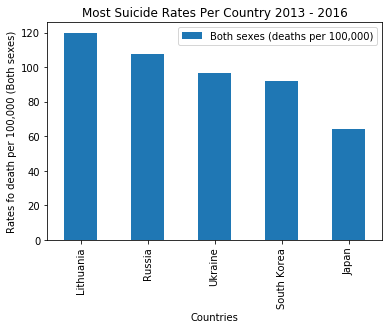

In [48]:
combined_QOF_df_suicide_top5.plot(kind = "bar")
plt.xlabel ('Countries')
plt.ylabel ('Rates fo death per 100,000 (Both sexes)')
plt.title ('Most Suicide Rates Per Country 2013 - 2016')
plt.show() 



In [39]:
#Stacey ends here
